<a href="https://colab.research.google.com/github/ohjisu320/study_dataanalytics/blob/main/docs/quests/DDA/SpineSurgeryList.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 전처리 과정 및 분석

In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Reuntime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 0 B/10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 121671 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new ca

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [2]:
df_SSL = pd.read_csv('SpineSurgeryList.csv')

In [3]:
df_SSL[:2]

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0


In [4]:
df_SSL.columns

Index(['Unnamed: 0', '환자ID', 'Large Lymphocyte', 'Location of herniation',
       'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부',
       '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)', '수술기법', '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

In [5]:
df_SSL['입원일자']

0       20190713
1       20190715
2       20190729
3       20190731
4       20190903
          ...   
1889    20170407
1890    20170426
1891    20170410
1892    20170408
1893    20170412
Name: 입원일자, Length: 1894, dtype: int64

In [8]:
df_SSL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1894 non-null   int64  
 1   환자ID                    1894 non-null   object 
 2   Large Lymphocyte        1894 non-null   float64
 3   Location of herniation  1894 non-null   int64  
 4   ODI                     462 non-null    float64
 5   가족력                     1843 non-null   float64
 6   간질성폐질환                  1894 non-null   int64  
 7   고혈압여부                   1894 non-null   int64  
 8   과거수술횟수                  1894 non-null   int64  
 9   당뇨여부                    1894 non-null   int64  
 10  말초동맥질환여부                1894 non-null   int64  
 11  빈혈여부                    1894 non-null   int64  
 12  성별                      1894 non-null   int64  
 13  스테로이드치료                 1894 non-null   int64  
 14  신부전여부                   1894 non-null   

## Quests

### 입원기간 분석
- 가장 빠른 퇴원 : 0days(-값은 이상치로 판단)
- 오랜 입원 기간 : 1125 days

In [142]:
# datetime으로 변경 및 입원기간 연산
df_SSL['입원일자_datetime'] = pd.to_datetime(df_SSL['입원일자'], format = '%Y%m%d')
df_SSL['퇴원일자_datetime'] = pd.to_datetime(df_SSL['퇴원일자'], format = '%Y%m%d')
df_SSL['입원기간_datetime'] = df_SSL['퇴원일자_datetime']- df_SSL['입원일자_datetime']

In [73]:
df_SSL['입원기간_datetime'].describe()

count                           1894
mean     -9 days +02:51:03.991552271
std      151 days 08:06:59.355943068
min             -2155 days +00:00:00
25%                  1 days 00:00:00
50%                  2 days 00:00:00
75%                  3 days 00:00:00
max               1125 days 00:00:00
Name: 입원기간_datetime, dtype: object

In [74]:
df_SSL['입원기간_datetime'].unique()

array([    259200000000000,      86400000000000,     345600000000000,
           172800000000000,     432000000000000,                   0,
           691200000000000,    8726400000000000,     950400000000000,
          1296000000000000,     864000000000000,   18748800000000000,
       -177897600000000000, -126489600000000000,  -87177600000000000,
        -89683200000000000,    8467200000000000,   21081600000000000,
        -74995200000000000,  -77846400000000000, -168566400000000000,
        -85795200000000000,   -7344000000000000, -166320000000000000,
          2505600000000000,    -518400000000000,   14947200000000000,
        -90633600000000000,   65404800000000000,  -33091200000000000,
       -158025600000000000,    4320000000000000,  -15638400000000000,
         97200000000000000, -163036800000000000,    5616000000000000,
         15292800000000000,   22377600000000000,   -3715200000000000,
        -63072000000000000, -182822400000000000,  -69379200000000000,
        -51840000000

### 오랜 입원 일자 중 5위까지 시각화

In [80]:
df_SSL.sort_values(by='입원기간_datetime', ascending=False).iloc[:5]


In [85]:
df_sorted = df_SSL.sort_values(by='입원기간_datetime', ascending=False).iloc[:5]

In [102]:
df_SSL.sort_values(by='입원기간_datetime', ascending=False).iloc[:5]

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,디스크위치,척추이동척도,척추전방위증,입원일자_datetime,퇴원일자_datetime,입원기간_datetime,수술일자_datetime,수술일자_datetime_year,수술일자_datetime_month,수술일자_datetime_day
1019,1019,1020PT,61.7,3,21.0,1.0,0,0,0,0,...,4,Down,0,2009-01-30,2012-02-29,1125 days,2009-01-30,2009,1,30
1014,1014,1015PT,48.8,2,24.0,0.0,0,0,0,0,...,5,Down,0,2010-02-02,2012-02-29,757 days,2010-02-03,2010,2,3
1033,1033,1034PT,52.3,3,27.0,0.0,0,0,2,0,...,4,Down,0,2010-04-26,2012-02-29,674 days,2010-04-26,2010,4,26
1034,1034,1035PT,34.9,3,NaN,0.0,0,0,0,0,...,3,Down,0,2011-01-27,2012-02-29,398 days,2011-01-27,2011,1,27
1031,1031,1032PT,46.2,3,31.0,0.0,0,0,0,0,...,3,Middle,0,2011-04-17,2012-02-29,318 days,2011-04-18,2011,4,18


Text(0.5, 1.0, '입원기간_datetime 별 환자ID')

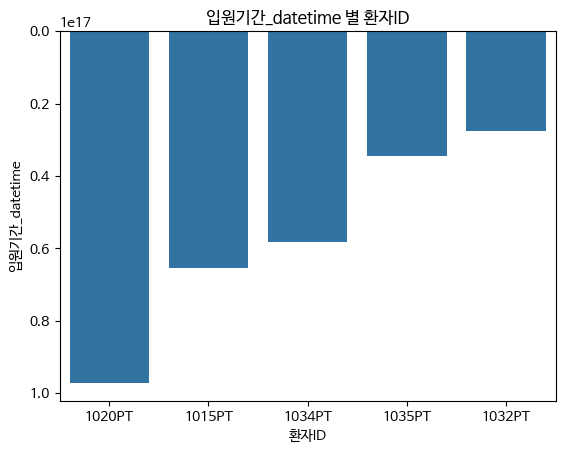

In [97]:
sns.barplot(data=df_sorted, x='환자ID', y='입원기간_datetime')
plt.title('입원기간_datetime 별 환자ID')

### 수술 일자를 분해(월, 주, 일)하고 시각화

##### 수술 일자를 분해(월, 주, 일)

In [141]:
df_SSL['수술일자_datetime'] = pd.to_datetime(df_SSL['수술일자'], format = '%Y%m%d')
df_SSL['수술일자_datetime_year'] = pd.to_datetime(df_SSL['수술일자_datetime']).dt.year
df_SSL['수술일자_datetime_month'] = pd.to_datetime(df_SSL['수술일자_datetime']).dt.month
df_SSL['수술일자_datetime_day'] = pd.to_datetime(df_SSL['수술일자_datetime']).dt.day

##### 수술 일자를 시각화

Text(0.5, 1.0, '수술일자_datetime_year')

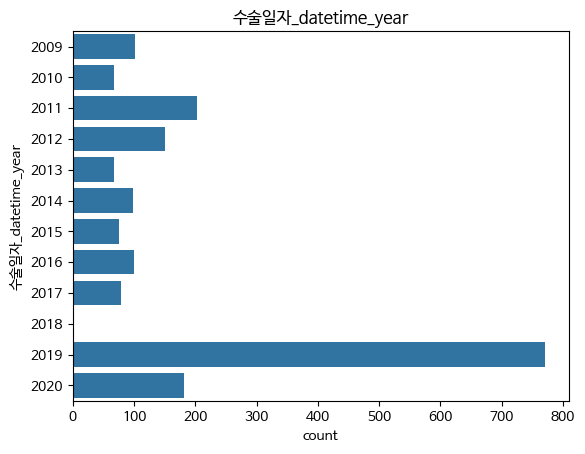

In [109]:
# 수술일자_datetime_year descending by date
year_count = sns.countplot(data=df_SSL,y='수술일자_datetime_year')
plt.title('수술일자_datetime_year descending by date')

Text(0.5, 1.0, '수술일자_datetime_year descending by count')

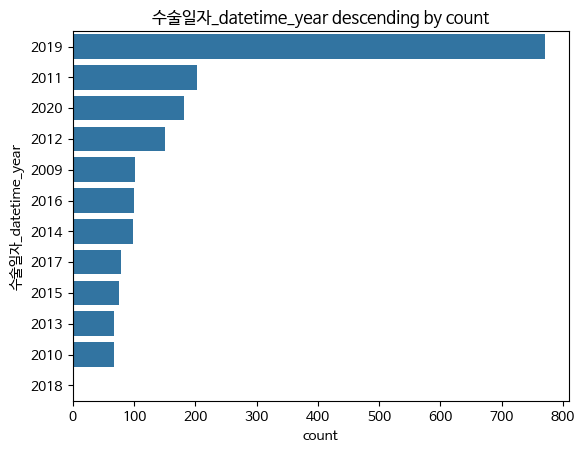

In [135]:
# 수술일자_datetime_year descending by count
series_datetime_year = df_SSL['수술일자_datetime_year'].value_counts()
list_year = series_datetime_year.index.to_list()
year_count_descending = sns.countplot(data=df_SSL,y='수술일자_datetime_year',order=list_year)
plt.title('수술일자_datetime_year descending by count')

Text(0.5, 1.0, '수수술일자_datetime_month descending by date')

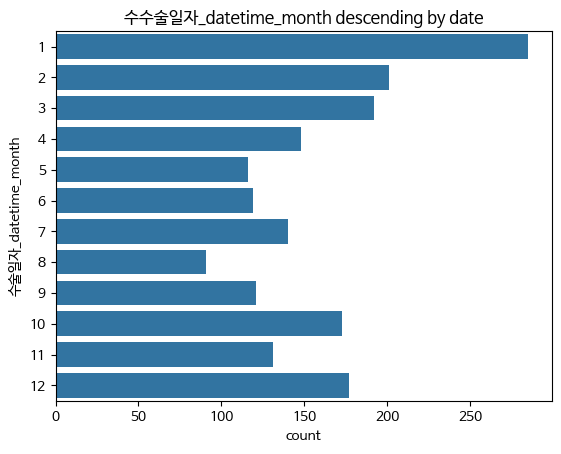

In [137]:
# 수술일자_datetime_month descending by date
month_count = sns.countplot(data=df_SSL,y='수술일자_datetime_month')
plt.title('수수술일자_datetime_month descending by date')

Text(0.5, 1.0, '수술일자_datetime_month descending by count')

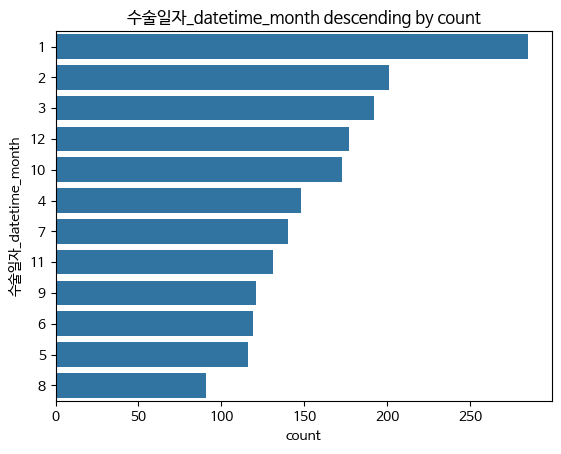

In [138]:
# 수술일자_datetime_month descending by count
series_datetime_month = df_SSL['수술일자_datetime_month'].value_counts()
list_month = series_datetime_month.index.to_list()
month_count = sns.countplot(data=df_SSL,y='수술일자_datetime_month', order=list_month)
plt.title('수술일자_datetime_month descending by count')

Text(0.5, 1.0, '수술일자_datetime_day')

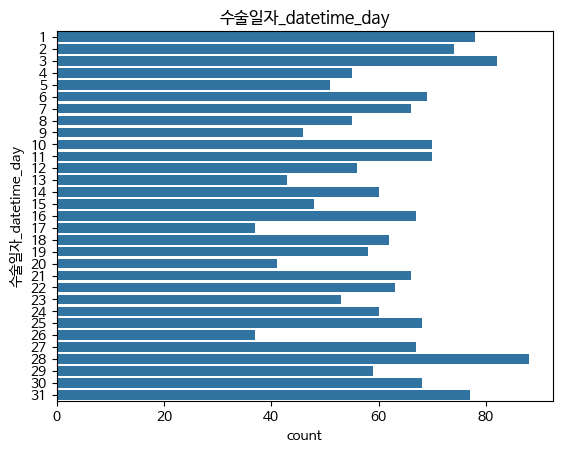

In [139]:
# 수술일자_datetime_day descending by date
day_count = sns.countplot(data=df_SSL,y='수술일자_datetime_day')
plt.title('수술일자_datetime_day')

Text(0.5, 1.0, '수술일자_datetime_day descending by count')

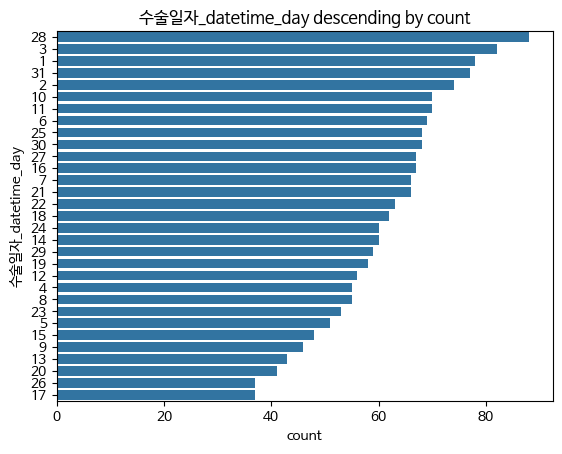

In [140]:
# 수술일자_datetime_day descending by count
series_datetime_day = df_SSL['수술일자_datetime_day'].value_counts()
list_day = series_datetime_day.index.to_list()
day_count = sns.countplot(data=df_SSL,y='수술일자_datetime_day', order=list_day)
plt.title('수술일자_datetime_day descending by count')